# Starbucks Capstone Challenge

### Introduction

This data set contains simulated data that mimics customer behavior on the Starbucks rewards mobile app. Once every few days, Starbucks sends out an offer to users of the mobile app. An offer can be merely an advertisement for a drink or an actual offer such as a discount or BOGO (buy one get one free). Some users might not receive any offer during certain weeks. 

Not all users receive the same offer, and that is the challenge to solve with this data set.

**Your task is to combine transaction, demographic and offer data to determine which demographic groups respond best to which offer type.** This _data set is a simplified version of the real Starbucks app_ because the underlying simulator only has one product whereas Starbucks actually sells dozens of products.

Every offer has a validity period before the offer expires. As an example, a BOGO offer might be valid for only 5 days. You'll see in the data set that informational offers have a validity period even though these ads are merely providing information about a product; for example, if an informational offer has 7 days of validity, you can assume the customer is feeling the influence of the offer for 7 days after receiving the advertisement.

You'll be given transactional data showing user purchases made on the app including the timestamp of purchase and the amount of money spent on a purchase. This transactional data also has a record for each offer that a user receives as well as a record for when a user actually views the offer. There are also records for when a user completes an offer. 

Keep in mind as well that someone using the app might make a purchase through the app without having received an offer or seen an offer.

### Example

To give an example, a user could receive a discount offer buy 10 dollars get 2 off on Monday. The offer is valid for 10 days from receipt. If the customer accumulates at least 10 dollars in purchases during the validity period, the customer completes the offer.

However, there are a few things to watch out for in this data set. Customers do not opt into the offers that they receive; in other words, a user can receive an offer, never actually view the offer, and still complete the offer. For example, a user might receive the "buy 10 dollars get 2 dollars off offer", but the user never opens the offer during the 10 day validity period. The customer spends 15 dollars during those ten days. There will be an offer completion record in the data set; however, the customer was not influenced by the offer because the customer never viewed the offer.

### Cleaning

This makes data cleaning especially important and tricky.

You'll also want to take into account that some demographic groups will make purchases even if they don't receive an offer. From a business perspective, if a customer is going to make a 10 dollar purchase without an offer anyway, you wouldn't want to send a buy 10 dollars get 2 dollars off offer. You'll want to try to assess what a certain demographic group will buy when not receiving any offers.

Isso significa que: se o cliente faz parte de um grupo que já está propenso a efetuar uma compra e a previsão é que ele não gaste esse valor amanhã, aí sim enviaremos a oferta.

### Final Advice

Because this is a capstone project, you are free to analyze the data any way you see fit. For example, you could build a machine learning model that predicts how much someone will spend based on demographics and offer type. Or you could build a model that predicts whether or not someone will respond to an offer. Or, you don't need to build a machine learning model at all. You could develop a set of heuristics that determine what offer you should send to each customer (i.e., 75 percent of women customers who were 35 years old responded to offer A vs 40 percent from the same demographic to offer B, so send offer A).

### Submission Files
At a minimum, your submission will be required to have the following files listed below. If your submission method of choice is uploading an archive (*.zip), please take into consideration the total file size. You will need to include

- Your **capstone proposal** document as **proposal.pdf** if you have completed the pre-requisite Capstone Proposal project. Please also include your review link in the student submission notes.
- A project report (**in PDF format only**) addressing the five major project development stages. The recommended page length for a project report is approximately nine to fifteen pages. **Please do not export an iPython Notebook as PDF for your project report**.
- All development Python code used for your project that is required to reproduce your implemented solution and result. Your code should be in a neat and well-documented format. Using iPython Notebooks is strongly encouraged for development.
- A `README` documentation file which briefly describes the software and libraries used in your project, including any necessary references to supporting material. If your project requires setup/startup, ensure that your `README` includes the necessary instructions.
- Any additional supporting material such as datasets, images, or input files that are necessary for your project's development and implementation. If these files are too large and you are uploading your submission, **instead provide appropriate means of acquiring the necessary files in your included `README`**.

# Data Sets

The data is contained in three files:

* portfolio.json - containing offer ids and meta data about each offer (duration, type, etc.)
* profile.json - demographic data for each customer
* transcript.json - records for transactions, offers received, offers viewed, and offers completed

Here is the schema and explanation of each variable in the files:

**portfolio.json**
* id (string) - offer id
* offer_type (string) - type of offer ie BOGO, discount, informational
* difficulty (int) - minimum required spend to complete an offer
* reward (int) - reward given for completing an offer
* duration (int) - time for offer to be open, in days
* channels (list of strings)

**profile.json**
* age (int) - age of the customer 
* became_member_on (int) - date when customer created an app account
* gender (str) - gender of the customer (note some entries contain 'O' for other rather than M or F)
* id (str) - customer id
* income (float) - customer's income

**transcript.json**
* event (str) - record description (ie transaction, offer received, offer viewed, etc.)
* person (str) - customer id
* time (int) - time in hours since start of test. The data begins at time t=0
* value - (dict of strings) - either an offer id or transaction amount depending on the record

**Note:** If you are using the workspace, you will need to go to the terminal and run the command `conda update pandas` before reading in the files. This is because the version of pandas in the workspace cannot read in the transcript.json file correctly, but the newest version of pandas can. You can access the termnal from the orange icon in the top left of this notebook.  

You can see how to access the terminal and how the install works using the two images below.  First you need to access the terminal:

<img src="pic1.png"/>

Then you will want to run the above command:

<img src="pic2.png"/>

Finally, when you enter back into the notebook (use the jupyter icon again), you should be able to run the below cell without any errors.

In [2]:
import pandas as pd
import numpy as np
import math
import json
import seaborn as sns
% matplotlib inline

# read in the json files
portfolio = pd.read_json('data/portfolio.json', orient='records', lines=True)
profile = pd.read_json('data/profile.json', orient='records', lines=True)
transcript = pd.read_json('data/transcript.json', orient='records', lines=True)

In [3]:
!pip install plotly==4.14.3

    99% |████████████████████████████████| 13.2MB 24.9MB/s eta 0:00:01   11% |███▊                            | 1.6MB 21.4MB/s eta 0:00:01    19% |██████▏                         | 2.6MB 22.7MB/s eta 0:00:01    27% |████████▉                       | 3.7MB 22.6MB/s eta 0:00:01    53% |█████████████████               | 7.0MB 23.3MB/s eta 0:00:01    100% |████████████████████████████████| 13.2MB 3.1MB/s 
  Running setup.py bdist_wheel for retrying ... done
  Stored in directory: /root/.cache/pip/wheels/d7/a9/33/acc7b709e2a35caa7d4cae442f6fe6fbf2c43f80823d46460c
Successfully built retrying
  Found existing installation: plotly 2.0.15
    Uninstalling plotly-2.0.15:
      Successfully uninstalled plotly-2.0.15


### 1.2. Exploring the data

In [4]:
def namestr(obj, namespace):
    return [name for name in namespace if namespace[name] is obj]

#### 1.2.1. Function to explore all the datasets

In [5]:
def exploring_dataset(datasets_list):
    """
    """
    for dataset in datasets_list:
        print("--------------- Dataset: ", namestr(dataset, globals())[0])
        print(dataset.dtypes)
        print(dataset.describe())
        print(dataset.shape)
        print(dataset.isnull().sum())

In [6]:
datasets_list = [profile, portfolio, transcript]
exploring_dataset(datasets_list)

--------------- Dataset:  profile
age                   int64
became_member_on      int64
gender               object
id                   object
income              float64
dtype: object
                age  became_member_on         income
count  17000.000000      1.700000e+04   14825.000000
mean      62.531412      2.016703e+07   65404.991568
std       26.738580      1.167750e+04   21598.299410
min       18.000000      2.013073e+07   30000.000000
25%       45.000000      2.016053e+07   49000.000000
50%       58.000000      2.017080e+07   64000.000000
75%       73.000000      2.017123e+07   80000.000000
max      118.000000      2.018073e+07  120000.000000
(17000, 5)
age                    0
became_member_on       0
gender              2175
id                     0
income              2175
dtype: int64
--------------- Dataset:  portfolio
channels      object
difficulty     int64
duration       int64
id            object
offer_type    object
reward         int64
dtype: object
       dif

In [11]:
profile.head()
# Features:
# - gasto médio histórico da pessoa
# - Tipo da oferta que mais tem registros (faz sentido?)
# - Canal que mais aceita as ofertas (web, email, mobile ou social)
# - Canal que menos aceita a ofertas (web, email, mobile ou social)

,age,became_member_on,gender,id,income
0,118,20170212,None,68be06ca386d4c31939f3a4f0e3dd783,NaN
1,55,20170715,F,0610b486422d4921ae7d2bf64640c50b,112000.0
2,118,20180712,None,38fe809add3b4fcf9315a9694bb96ff5,NaN
3,75,20170509,F,78afa995795e4d85b5d9ceeca43f5fef,100000.0
4,118,20170804,None,a03223e636434f42ac4c3df47e8bac43,NaN


### 1.3. Pre-Process The Data

#### 1.3.1. Pre-processing Profile dataset

In [13]:
profile.isnull().sum()

age                    0
became_member_on       0
gender              2175
id                     0
income              2175
dtype: int64

In [14]:
profile.head()

,age,became_member_on,gender,id,income
0,118,20170212,None,68be06ca386d4c31939f3a4f0e3dd783,NaN
1,55,20170715,F,0610b486422d4921ae7d2bf64640c50b,112000.0
2,118,20180712,None,38fe809add3b4fcf9315a9694bb96ff5,NaN
3,75,20170509,F,78afa995795e4d85b5d9ceeca43f5fef,100000.0
4,118,20170804,None,a03223e636434f42ac4c3df47e8bac43,NaN


In [15]:
profile.loc[profile['income'].isnull()]['age'].unique()

array([118])

In [17]:
2175/len(profile)

0.12794117647058822

We saw that there are 2175 records where the columns 'gender' and 'income' are NaN values. We also can see whenever we have a NaN value in one of the columns 'gender' and 'income' we got an 'age' equals to 118, which means is a default value when the user doesn't inform 'gender', 'income' and 'age'. 

As we got 12.8% of the records with NaN values, a relevant number, let's fill the rows with a new category 'Uninformed' to 'gender' column and use the mean to fill NaN values in 'income' column.

In [21]:
profile['income'].mean()

65404.991568296799

In [22]:
profile['gender'].fillna("Uninformed", inplace=True)
mean_income = profile['income'].mean()
profile['income'].fillna(mean_income, inplace=True)
profile.isnull().sum()

age                 0
became_member_on    0
gender              0
id                  0
income              0
dtype: int64

#### 1.3.2. Pre-processing Transcript dataset

In [23]:
transcript.head()

,event,person,time,value
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}
1,offer received,a03223e636434f42ac4c3df47e8bac43,0,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}
2,offer received,e2127556f4f64592b11af22de27a7932,0,{'offer id': '2906b810c7d4411798c6938adc9daaa5'}
3,offer received,8ec6ce2a7e7949b1bf142def7d0e0586,0,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'}
4,offer received,68617ca6246f4fbc85e91a2a49552598,0,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'}


In [24]:
transcript.event.unique()

array(['offer received', 'offer viewed', 'transaction', 'offer completed'], dtype=object)

In the dataset transcript, we have four types of user interaction with offers: offer received, offer viewed, offer completed and transaction. We want to use 'transaction' records to get how much and when a user spent.

We are interested in understand the behaviour of the users which received and view an offer and after that made a transaction during the offer duration period.

In [25]:
transcript.loc[transcript["person"] =='02c083884c7d45b39cc68e1314fec56c'].head()

,event,person,time,value
27,offer received,02c083884c7d45b39cc68e1314fec56c,0,{'offer id': 'ae264e3637204a6fb9bb56bc8210ddfd'}
12653,offer viewed,02c083884c7d45b39cc68e1314fec56c,0,{'offer id': 'ae264e3637204a6fb9bb56bc8210ddfd'}
12654,transaction,02c083884c7d45b39cc68e1314fec56c,0,{'amount': 0.8300000000000001}
15565,transaction,02c083884c7d45b39cc68e1314fec56c,6,{'amount': 1.44}
18071,transaction,02c083884c7d45b39cc68e1314fec56c,12,{'amount': 4.5600000000000005}


In [8]:
transcript.loc[transcript["event"] == 'transaction'].head()

,event,person,time,value
12654,transaction,02c083884c7d45b39cc68e1314fec56c,0,{'amount': 0.8300000000000001}
12657,transaction,9fa9ae8f57894cc9a3b8a9bbe0fc1b2f,0,{'amount': 34.56}
12659,transaction,54890f68699049c2a04d415abc25e717,0,{'amount': 13.23}
12670,transaction,b2f1cd155b864803ad8334cdf13c4bd2,0,{'amount': 19.51}
12671,transaction,fe97aa22dd3e48c8b143116a8403dd52,0,{'amount': 18.97}


We can see that we have 10 offer types with specific difficulty level, offer duration, distribution channels and rewards.

About users profile dataset, we have 17,000 users with 2,175 NaN values in the 'income' and 'gender' columns. We'll need to decide how we can deal with those values.

In the transcript.json dataset, we have 306,534 user interactions with none NaN values with interactions that describe what and who user performs in the Starbucks application. When a offer is record is a offer of type 'transaction' we have the value we'll want to predict in the 'value' column of this dataset, 'amount' value.

In [28]:
# Creates a new column called 'amount' which will be our target
transcript.loc[transcript["event"] == 'transaction', 'amount'] = transcript.loc[transcript["event"] == 'transaction', 'value'].apply(lambda x: x['amount']) #[:1].values[0]

138953

In [29]:
len(transcript.loc[transcript["event"] == 'transaction'])

138953

Here we can see we have 138,953 records to train our model. We'll want use only offers which were completed.

In [43]:
# Get the offer_id of the completed offers
condition = (transcript["event"] == 'offer completed')
transcript.loc[condition, 'offer_id'] = transcript.loc[condition, 'value'].apply(lambda x: x['offer_id'])
transcript.loc[condition, 'reward'] = transcript.loc[condition, 'value'].apply(lambda x: x['reward'])
transcript.loc[condition].head()

,event,person,time,value,amount,offer_id,day,reward
12658,offer completed,9fa9ae8f57894cc9a3b8a9bbe0fc1b2f,0,{'offer_id': '2906b810c7d4411798c6938adc9daaa5...,NaN,2906b810c7d4411798c6938adc9daaa5,1,2.0
12672,offer completed,fe97aa22dd3e48c8b143116a8403dd52,0,{'offer_id': 'fafdcd668e3743c1bb461111dcafc2a4...,NaN,fafdcd668e3743c1bb461111dcafc2a4,1,2.0
12679,offer completed,629fc02d56414d91bca360decdfa9288,0,{'offer_id': '9b98b8c7a33c4b65b9aebfe6a799e6d9...,NaN,9b98b8c7a33c4b65b9aebfe6a799e6d9,1,5.0
12692,offer completed,676506bad68e4161b9bbaffeb039626b,0,{'offer_id': 'ae264e3637204a6fb9bb56bc8210ddfd...,NaN,ae264e3637204a6fb9bb56bc8210ddfd,1,10.0
12697,offer completed,8f7dd3b2afe14c078eb4f6e6fe4ba97d,0,{'offer_id': '4d5c57ea9a6940dd891ad53e9dbe8da0...,NaN,4d5c57ea9a6940dd891ad53e9dbe8da0,1,10.0


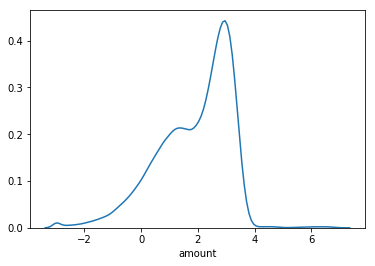

In [13]:
sns.distplot(np.log(transcript.loc[transcript["event"] == 'transaction', 'amount']), hist=False)

In [14]:
transcript['day'] = transcript['time'].apply(lambda x: int(x/24)+1)

### Pre-process the data

### Create Time Series